<a href="https://colab.research.google.com/github/kristipatithoyajakshakashyap/Deep-learning/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Handwritten Digit Classification using Deep Learning**

# importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 
from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist 
from tensorflow.math import confusion_matrix

## Loading the MNIST data from keras dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# Shape of arrays 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images

Test data = 10,000 images 

Image dimension => 28 x 28

Grayscale image => 1 channel 

In [ ]:
# Printing 10th image 
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


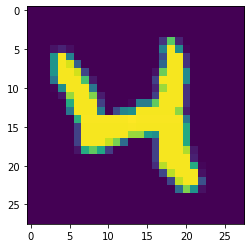

4


In [ ]:
# displaying the image 
plt.imshow(X_train[20])
plt.show()
# print the corresponding label
print(y_train[20])

## Image labels 

In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in y_train
print(np.unique(y_train))
# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding. 

All the images have the same dimensions in the dataset. else we need to resize all the images to a common dimension.

In [ ]:
# Scaling the values 

X_train = X_train/255
X_test = X_test/255

In [ ]:
# Printing 10th image 
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Building the Neural Network

In [ ]:
# set random seed 
tf.random.set_seed(42)

# Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

# Compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model 
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.3024 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1431 - accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1049 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0699 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0602 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9837
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.9844
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0397 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.03

Training data accuracy = 98.8%

**Accuracy on Test data:**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9739
0.9739000201225281


Test data accuracy = 97.1%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


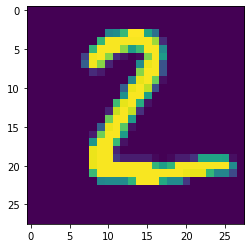

In [ ]:
# First data point in X_test
plt.imshow(X_test[1])
plt.show()

In [ ]:
print(y_test[10])

0


In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
print(y_pred[1])

[1.05149820e-05 8.85362864e-01 9.99999523e-01 9.34131801e-01
 1.19485530e-05 3.39106628e-04 4.02496569e-03 8.44761830e-11
 1.48329865e-02 1.01021411e-04]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# Converting prediction probabilities to class label 

label_for_first_image = np.argmax(y_pred[1])
print(label_for_first_image)

2


In [ ]:
# Converting prediction probabilities to class label for all test data points 

y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[10]

0

## Condusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_label)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 968    0    2    2    2    0    2    0    1    3]
 [   0 1124    1    2    0    1    3    1    3    0]
 [   3    3 1002    6    4    1    2    2    8    1]
 [   0    0    4  992    0    4    0    1    8    1]
 [   0    0    4    0  965    1    1    2    0    9]
 [   3    0    0   12    3  861    8    0    5    0]
 [   4    2    1    1   10    5  931    0    4    0]
 [   1    5   11   10    2    1    0  987    1   10]
 [   6    1    4   12    5    4    3    1  934    4]
 [   2    3    1    3   13    6    0    5    1  975]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted label')

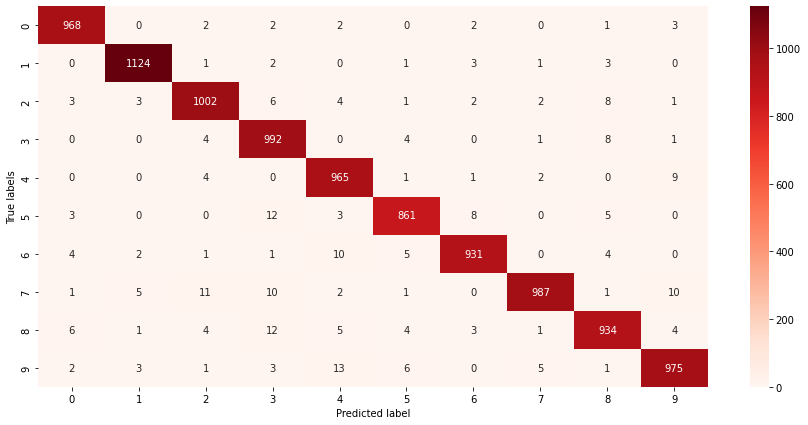

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True, fmt='d', cmap='Reds')
plt.ylabel('True labels')
plt.xlabel('Predicted label')

## Building a predictive system 

In [ ]:
input_image_path = '/content/7.jpg'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[143 143 143]
  [113 113 113]
  [113 113 113]
  ...
  [109 109 109]
  [ 99  99  99]
  [194 194 194]]

 [[110 110 110]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [183 183 183]]

 [[114 114 114]
  [  2   2   2]
  [  4   4   4]
  ...
  [  1   1   1]
  [  1   1   1]
  [184 184 184]]

 ...

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]]


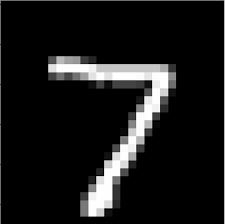

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(224, 225, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(224, 225)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 18ms/step
[[1.1844683e-03 1.4904811e-04 8.1197935e-01 9.9364763e-01 4.7412181e-05
  2.7777377e-01 3.6884120e-09 9.9999928e-01 5.9389895e-05 9.3793917e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

7


**Predictive system**

Path of the image to be predicted: /content/7.jpg


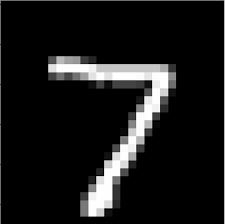

1/1 [==============================] - 0s 21ms/step
The Handwritten Digit is recognised as  7


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ',input_pred_label)